In [1]:
# ============================================================
# 🔧 1. Importar librerías necesarias
# ============================================================
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# ============================================================
# 📁 2. Configuración de rutas
# ============================================================
BASE_DIR = "/kaggle/input/pothole-detection-dataset"  # Cambiar si usas Colab
TRAIN_DIR = BASE_DIR  # Usa la misma ruta para entrenamiento y validación con split

In [2]:
# ============================================================
# 🧩 3. Generadores de datos con aumento y división de validación
# ============================================================
datagen = ImageDataGenerator(
    rescale=1.0/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 546 images belonging to 2 classes.
Found 135 images belonging to 2 classes.


In [3]:
# ============================================================
# 🧠 4. Definición del modelo CNN
# ============================================================
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(64,64,3)),
    MaxPooling2D(pool_size=(2,2)),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               1605760   
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

In [4]:
# ============================================================
# ⏳ 5. Entrenamiento del modelo
# ============================================================
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=15,
    verbose=1
)

Epoch 1/15
18/18 [==============================] - 21s 1s/step - loss: 0.7117 - accuracy: 0.5220 - val_loss: 0.6119 - val_accuracy: 0.6593
Epoch 2/15
18/18 [==============================] - 14s 749ms/step - loss: 0.5573 - accuracy: 0.7079 - val_loss: 0.5198 - val_accuracy: 0.7407
Epoch 3/15
18/18 [==============================] - 14s 820ms/step - loss: 0.4248 - accuracy: 0.8217 - val_loss: 0.5096 - val_accuracy: 0.7704
Epoch 4/15
18/18 [==============================] - 14s 784ms/step - loss: 0.2824 - accuracy: 0.8682 - val_loss: 0.3657 - val_accuracy: 0.8222
Epoch 5/15
18/18 [==============================] - 14s 759ms/step - loss: 0.2562 - accuracy: 0.8906 - val_loss: 0.5020 - val_accuracy: 0.7407
Epoch 6/15
18/18 [==============================] - 14s 781ms/step - loss: 0.2393 - accuracy: 0.8993 - val_loss: 0.4228 - val_accuracy: 0.8000
Epoch 7/15
18/18 [==============================] - 14s 802ms/step - loss: 0.2432 - accuracy: 0.9070 - val_loss: 0.4798 - val_accuracy: 0.8148
Ep

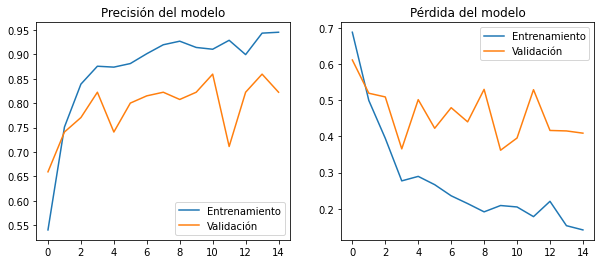

In [5]:
# ============================================================
# 📊 6. Visualización del entrenamiento
# ============================================================
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión del modelo')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida del modelo')
plt.legend()
plt.show()

In [6]:
# ============================================================
# 🖼️ 7. Función de predicción personalizada
# ============================================================
def predict_image(model, img_path, target_size=(64,64)):
    """
    Carga una imagen y devuelve la predicción del modelo entrenado.
    """
    img = load_img(img_path, target_size=target_size)
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    
    prediction = model.predict(img_array)[0][0]
    label = "Pothole" if prediction > 0.5 else "Normal"
    
    plt.imshow(load_img(img_path))
    plt.title(f"Predicción: {label} ({prediction:.2f})")
    plt.axis("off")
    plt.show()

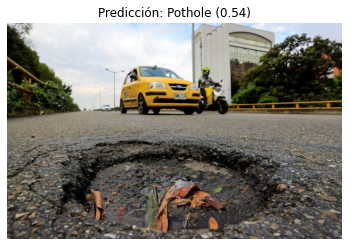

In [17]:
# ============================================================
# 🔍 8. Ejemplo de uso con una imagen
# ============================================================
test_image_path = "/kaggle/input/fotosmed/hueco 7.jpg"  # Cambia según tu dataset
predict_image(model, test_image_path)

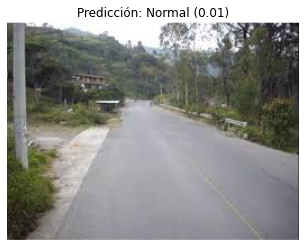

In [19]:
# ============================================================
# 🔍 8. Ejemplo de uso con una imagen
# ============================================================
test_image_path = "/kaggle/input/fotosmed-normales/normal 9.jpg"  # Cambia según tu dataset
predict_image(model, test_image_path)

In [21]:
model.save("/kaggle/working/modelo_entrenado.keras")